# **INFOSEC/CYBERSECURITY SALARIES CLASSIFICATION**

# **Import Dataset from Drive** 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mtp

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/PrakDatmin/cyberjob_salaries.csv')

Mounted at /content/drive


# **Data Understanding**

In [ ]:
df.shape

(848, 4)

In [ ]:
dataset = df.copy()
dataset.head()

,work_year,salary,salary_in_usd,remote_ratio
0,2022,68000,72762.0,100
1,2022,123400,123400.0,0
2,2022,88100,88100.0,0
3,2022,163575,163575.0,100
4,2022,115800,NaN,100


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   work_year      848 non-null    int64  
 1   salary         848 non-null    int64  
 2   salary_in_usd  845 non-null    float64
 3   remote_ratio   848 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 26.6 KB


In [ ]:
dataset.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,848.000000,8.480000e+02,845.000000,848.000000
mean,2021.770047,7.353011e+05,130531.169231,76.650943
std,0.461197,1.716552e+07,70001.890839,38.686960
min,2020.000000,2.000000e+03,2000.000000,0.000000
25%,2022.000000,9.000000e+04,85000.000000,50.000000
50%,2022.000000,1.300000e+05,125000.000000,100.000000
75%,2022.000000,1.720000e+05,165000.000000,100.000000
max,2022.000000,5.000000e+08,899920.000000,100.000000


In [ ]:
dataset.shape

(848, 4)

In [ ]:
dataset.isnull().sum()

work_year        0
salary           0
salary_in_usd    3
remote_ratio     0
dtype: int64

Terdapat Missing Value pada dataset ini yakni pada kolom salary_in_usd

# **Data Preparation and Cleaning**


Delete Rows that contain Missing Value

In [ ]:
df = df.dropna(axis=0)
df

,work_year,salary,salary_in_usd,remote_ratio
0,2022,68000,72762.0,100
1,2022,123400,123400.0,0
2,2022,88100,88100.0,0
3,2022,163575,163575.0,100
7,2022,109280,109280.0,100
...,...,...,...,...
843,2021,50000,50000.0,0
844,2021,45000,61896.0,100
845,2021,150000,177308.0,100
846,2021,1000000,13523.0,50


Dari operasi diatas, kita berhasil menghapus 3 rows yang mengandung Missing Value

# **Data Encoding**
Encode object value to numerical

**Namun pada dataset cyberjob_salaries.csv tidak perlu diencode karena tidak ada object value di dalamnya**

# **Algorithm, Modeling, and Evaluation**

Using KNN Algorithm and Evaluation in Accuracy, Precision, Recall, F1 Score

In [ ]:
import numpy as np # linear algebra
from matplotlib.colors import ListedColormap
from sklearn import dataset, neighbors
from mlxtend.plotting import plot_decision_regions

In [ ]:
df.head(10)

,work_year,salary,salary_in_usd,remote_ratio
0,2022,68000,72762.0,100
1,2022,123400,123400.0,0
2,2022,88100,88100.0,0
3,2022,163575,163575.0,100
7,2022,109280,109280.0,100
8,2022,211600,211600.0,100
9,2022,182160,182160.0,100
10,2022,211600,211600.0,100
11,2022,182160,182160.0,100
12,2022,145000,145000.0,100


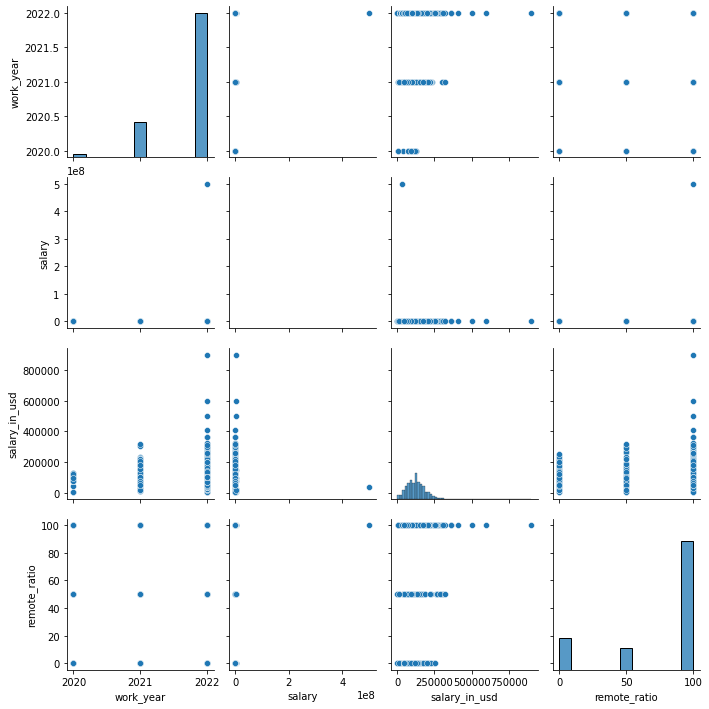

In [ ]:
# Data Modelling
import seaborn as sns
sns.pairplot(df)

In [ ]:
# Dependent Variable
y = df["remote_ratio"]
# Independent Variable
x = df.drop(["remote_ratio"], axis = 1)
x.head()

,work_year,salary,salary_in_usd
0,2022,68000,72762.0
1,2022,123400,123400.0
2,2022,88100,88100.0
3,2022,163575,163575.0
7,2022,109280,109280.0


In [ ]:
y.head()

0    100
1      0
2      0
3    100
7    100
Name: remote_ratio, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Activating Classification Function
klasifikasi = KNeighborsClassifier(n_neighbors=12)

In [ ]:
# Input data training ke fungsi klasifikasi
klasifikasi.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [ ]:
# Determine x_test prediction result
y_pred = klasifikasi.predict(x_test)
y_pred

array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100,   0, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100,   0, 100, 100, 100, 100,   0, 100,  50,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100,   0, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,   0,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100,   0, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100,  50, 100, 100, 100, 100, 100,
       100, 100, 100,  50, 100, 100, 100, 100, 100, 100, 100, 100,   0])

In [ ]:
len(y_pred)

169

In [ ]:
# Determine probability of prediction result
klasifikasi.predict_proba(x_test)

array([[0.25      , 0.        , 0.75      ],
       [0.33333333, 0.        , 0.66666667],
       [0.16666667, 0.08333333, 0.75      ],
       [0.41666667, 0.        , 0.58333333],
       [0.25      , 0.08333333, 0.66666667],
       [0.        , 0.        , 1.        ],
       [0.16666667, 0.        , 0.83333333],
       [0.25      , 0.        , 0.75      ],
       [0.        , 0.25      , 0.75      ],
       [0.16666667, 0.33333333, 0.5       ],
       [0.16666667, 0.        , 0.83333333],
       [0.25      , 0.08333333, 0.66666667],
       [0.16666667, 0.16666667, 0.66666667],
       [0.08333333, 0.08333333, 0.83333333],
       [0.08333333, 0.        , 0.91666667],
       [0.33333333, 0.25      , 0.41666667],
       [0.41666667, 0.        , 0.58333333],
       [0.41666667, 0.25      , 0.33333333],
       [0.25      , 0.        , 0.75      ],
       [0.16666667, 0.16666667, 0.66666667],
       [0.16666667, 0.25      , 0.58333333],
       [0.08333333, 0.        , 0.91666667],
       [0.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[  1   1  22]
 [  1   0  17]
 [  5   2 120]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.14      0.04      0.06        24
          50       0.00      0.00      0.00        18
         100       0.75      0.94      0.84       127

    accuracy                           0.72       169
   macro avg       0.30      0.33      0.30       169
weighted avg       0.59      0.72      0.64       169



In [ ]:
# Accuracy Score
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, y_pred)
accuracy

0.7159763313609467

Nilai Accuracy K=12: 0.71 atau 71%

In [ ]:
error_rate=[]
for i in range (1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

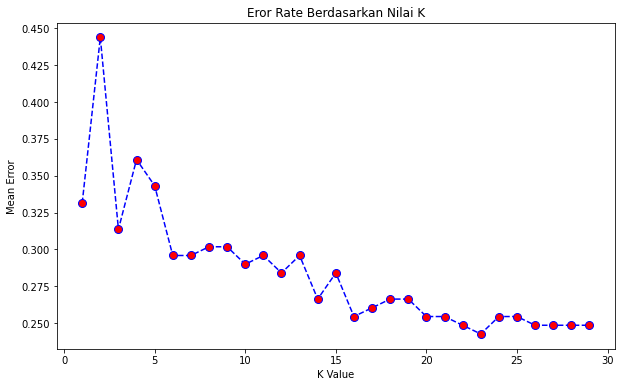

In [ ]:
mtp.figure(figsize=(10,6))
mtp.plot(range(1,30),error_rate, color='blue',linestyle='dashed', marker='o', markerfacecolor = 'red', markersize = 8)
mtp.title('Eror Rate Berdasarkan Nilai K')
mtp.xlabel('K Value')
mtp.ylabel('Mean Error')

Pada output diatas, Error Rate paling rendah berada di K=23

In [ ]:
# Training and Prediction
from sklearn.neighbors import KNeighborsClassifier
classifier23 = KNeighborsClassifier(n_neighbors=23) # Menentukan nilai K (banyaknya tetangga terdekat yg menjadi acuan klasifikasi) 
classifier23.fit(x_train, y_train)

# Prediction
# Output hasil prediksi dengan K=23
y_pred23 = classifier23.predict(x_test).tolist()
print("Output hasil prediksi dengan K=23 \n", y_pred23)

y_actual23=y_test.tolist()
print("Confusion Matrix \n", confusion_matrix(y_actual23,y_pred23))

# Akurasi K=23
accuracy = accuracy_score(y_actual23, y_pred23)
print("Akurasi K=23 :", accuracy)

print("\n", classification_report(y_actual23, y_pred23))

Output hasil prediksi dengan K=23 
 [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 0, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Confusion Matrix 
 [[  1   0  23]
 [  0   0  18]
 [  0   0 127]]
Akurasi K=23 : 0.757396449704142

               precis

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hasil dari proses Training and Prediction di atas menghasilkan K=23 adalah K terbaik karena memiliki nilai akurasi 0.75 atau 75% yang lebih besar dari K=12 yang hanya bernilai 0.71 atau 71%